<a href="https://colab.research.google.com/github/AnastasiaSperanskaya/MachineLearningITMO/blob/main/midtermTests/midtermTest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Рубежная контрольная работа

Эту работу выполнять не обязательно. Баллы набранные за работу просуммируются с баллами, которые будут набраны за контрольную работу 2 и выставлены как оценка за экзамен "автоматом". 

Сделайте копию ноутбука

Присвойте переменной `v` значение свой табельный номер ИСУ, это нужно для определения вашего варианта. Запустите код в следующей ячейке.

In [ ]:
from datetime import datetime
current_datetime = datetime.now()
print(current_datetime)
v = 264248

2020-10-28 10:42:09.990390


## Задание 1

В задании требуется использовать свою реализацию kNN. В обоих задания в качестве расстояния между объектами используйте евклидово расстояние.

Потребуется протестировать эту реализацию на наборе данных breast_cancer:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

Для выбора варианта, запустите код в следующей ячейке



In [ ]:
if (int(str(v)[2]) % 2) == 0:
  print ('1.1 Настроить гиперпараметр k, для оценки качества использовать метрику precision = TP / (TP + FP)')
else:
  print ('1.1 Настроить гиперпараметр k, для оценки качества использовать метрику recall = TP / (TP + FN)')

if (int(str(v)[3]) % 2) == 0:
  print ('1.2 Построить график зависимости метрики качества на обучающей выборке от количества соседей')
else: 
  print ('1.2 Построить график зависимости метрики качества на контрольной выборке от количества соседей')

1.1 Настроить гиперпараметр k, для оценки качества использовать метрику precision = TP / (TP + FP)
1.2 Построить график зависимости метрики качества на обучающей выборке от количества соседей


Для корректной работы с графиками в python требуется загрузить специальную библиотеку
**matplotlib**, программную библиотеку на языке python для визуализации данных двумерной и трехмерной графикой.

Графики используются для облегчения интерпретации полученных результатов, а также в качестве иллюстраций в презентациях и отчетах. 

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

X_train = X_train.values
X_test = X_test.values

In [ ]:
class KNearestNeighbours:
  def __init__(self):
    pass

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X, k=1):
    dists = self.compute_distances(X)
    return self.predict_labels(dists, k=k)

  def compute_distances(self, X):
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
      for j in range(num_train):
        dists[i, j] = np.sum((X[i] - self.X_train[j]) ** 2) ** 0.5
    return dists

  def predict_labels(self, dists, k=1):
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in range(num_test):
      indices = np.argsort(dists[i])[:k]
      labels = self.y_train[indices]
      y_pred[i] = Counter(labels).most_common(1)[0][0]
    return y_pred


In [ ]:
knn = KNearestNeighbours()
knn.fit(X_train, y_train)
y_pred_1 = knn.predict(X_test,1)

In [ ]:
def precision(y_pred, y_test):
  tp = 0
  for i in range(y_pred.shape[0]):
    if y_pred[i] == y_test[i]:
      tp=tp+1
  fp = y_pred.shape[0] - tp
  return tp/(fp+tp) 

In [ ]:
#1.1 Настроить гиперпараметр k, для оценки качества использовать метрику precision = TP / (TP + FP)
neighbours_examined_amount = 10 #верхнее значение для настраимого гиперпараметра
max = precision(y_pred_1, y_test)
k = 1
for j in range(1,neighbours_examined_amount+1):
  y_pred = knn.predict(X_test, j)
  p = precision(y_pred, y_test)
  if precision(y_pred, y_test) > max:
    max = precision(y_pred, y_test)
    k = j

print(k, "the best hyperparameter from", neighbours_examined_amount, "values")
print(max, "precision value for", k)

10 the best hyperparameter from 10 values
0.9532163742690059 precision value for 10


Text(0.5, 0, 'k : neighbours amount')

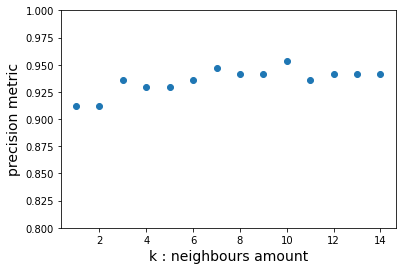

In [ ]:
#1.2 Построить график зависимости метрики качества на обучающей выборке от количества соседей
import matplotlib
import matplotlib.pyplot as plt

x = np.array([])
y = np.array([])
for j in range(1,15):
  y_pred = knn.predict(X_test, j)
  p = precision(y_pred, y_test)
  y = np.append(y, p)
  x = np.append(x, j)

plt.scatter(x, y)
plt.ylim(0.8, 1)
plt.ylabel("precision metric", fontsize=14)
plt.xlabel("k : neighbours amount", fontsize=14)

# 2. Обработать данные перед обучением модели

Во втором задании в качестве исходных данных используется словарь кинокритиков и выставленных ими оценок

In [ ]:
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}

По этому словарю нужно сделать Dataframe в pandas. Строки это критики, столбцы - названия фильмов. На пересечении поставленные оценки. При отсуствии оценки у критика за фильм в датафрейме нужно поставить 0.

In [ ]:
import pandas as pd
data = [
  ['Lisa Rose',2.5,3.5,3.0,3.5,2.5,3.0],
  ['Gene Seymour',3.0,3.5,1.5,5.0,3.5,3.0],
  ['Michael Phillips',2.5,3.0,0,3.5,0,4.0], 
  ['Claudia Puig',0,3.5,3.0,4.0,2.5,0],
  ['Mick LaSalle',2.5,4.0,2.0,3.0,2.0,3.0],
  ['Jack Matthews',3.0,4.0,0,5.0,3.5,3.0],
  ['Toby',0,4.5,0,4.0,1.0,0],
    ]
data = pd.DataFrame(data, columns = ['name','Lady in the Water','Snakes on a Plane','Just My Luck','Superman Returns','You, Me and Dupree','The Night Listener'])
data

,name,Lady in the Water,Snakes on a Plane,Just My Luck,Superman Returns,"You, Me and Dupree",The Night Listener
0,Lisa Rose,2.5,3.5,3.0,3.5,2.5,3.0
1,Gene Seymour,3.0,3.5,1.5,5.0,3.5,3.0
2,Michael Phillips,2.5,3.0,0.0,3.5,0.0,4.0
3,Claudia Puig,0.0,3.5,3.0,4.0,2.5,0.0
4,Mick LaSalle,2.5,4.0,2.0,3.0,2.0,3.0
5,Jack Matthews,3.0,4.0,0.0,5.0,3.5,3.0
6,Toby,0.0,4.5,0.0,4.0,1.0,0.0


Для выбора варианта, запустите код в следующей ячейке

In [ ]:
if (int(str(v)[4]) % 2) == 0:
  print ('2.1 Используя модификацию метода kNN сделать предсказание оценок для критика Michael Phillips по фильмам, которые он ещё не видел')
else:
  print ('2.1 Используя модификацию метода kNN сделать предсказание оценок для фильма Just My Luck по критикам, которые его ещё не видели')

if (int(str(v)[5]) % 2) == 0:
  print ('2.2 В модификации k не задаётся, задаётся максимальное расстояние до соседа = 3, при этом нужно учитывать вес каждого соседа, чем ближе, тем больше вес')
else: 
  print ('2.2 В модификации k задаётся равной 3, но при этом нужно учитывать вес каждого соседа, чем ближе, тем больше вес')

2.1 Используя модификацию метода kNN сделать предсказание оценок для критика Michael Phillips по фильмам, которые он ещё не видел
2.2 В модификации k не задаётся, задаётся максимальное расстояние до соседа = 3, при этом нужно учитывать вес каждого соседа, чем ближе, тем больше вес


Фактически здесь требуется применить модификацию kNN для предсказания действительного числа, как в задаче регресии, а не как в задачи классификации. 

ПОсле завершения контрольной работы, дайте ссылку на ноутбук в отдельном followup в своей теме на Piazza. Дайте разрешение на его просмотр.

Не забудьте запустить код в последней ячейке для контроля времени выполнения.

In [ ]:
current_datetime = datetime.now()
print(current_datetime)

2020-10-28 12:59:49.937870
